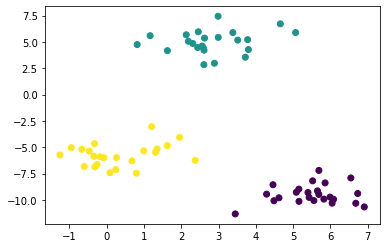

In [15]:
# import packages
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# define input arguments
n_samples = 70
n_features = 2
n_clusters = 3
random_state = 10

# create initial blobs that we will base clusters around
X, y = make_blobs(n_samples = n_samples, n_features = n_features, centers = n_clusters, random_state = random_state)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [16]:
# selecting centroids with k-means++ method
# set up list starting with first x value of points generated above

def plus_plus(X, n_clusters, random_state):
    
    np.random.seed(random_state)
    centroids = [X[0]]
    print(centroids)

    for i in range(1, n_clusters):
        
        distance_square = []
        for x in X:
            distance = []
            for c in centroids:
                distance.append([np.inner(c-x, c-x)])
            distance_square.append(min(distance))
        distance_square = np.array(distance_square)  
        
        probabilities = distance_square/distance_square.sum()
        cumulative_probabilities = probabilities.cumsum()
        rand = np.random.rand()

        for j, p in enumerate(cumulative_probabilities):
            if rand < p:
                i = j
                break

        centroids.append(X[i])
    print(centroids)
    return centroids

[array([2.19087156, 5.06566526])]
[array([2.19087156, 5.06566526]), array([  6.68288513, -10.31693051]), array([ 1.95552599, -4.05690149])]


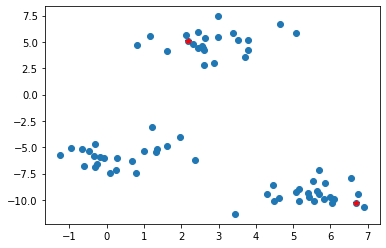

In [17]:
initial_centroid_points = plus_plus(X, n_clusters, random_state)
# show all points with randomly selected initial centroids in red
plt.scatter(X[:, 0], X[:, 1])
plt.plot(initial_centroid_points[0][0], initial_centroid_points[0][1], 'r*')
plt.plot(initial_centroid_points[1][0], initial_centroid_points[1][1], 'r*')

In [255]:
# assign points to clusters with this method
def cluster(X, centroid_points):
    # establish centroid points
    x1 = centroid_points[0][0]
    x2 = centroid_points[0][1]
    y1 = centroid_points[1][0]
    y2 = centroid_points[1][1]
    # set up output cluster arrays
    c1 = []
    c2 = []
    # itterate through points finding shortest distance between each centroid
    # add point to respective cluster depending on which it is closer to
    for i in X:
        d1 = distance_calc(x1, y1, i[0], i[1])
        d2 = distance_calc(x2, y2, i[0], i[1])
        if d1 < d2:
            c1.append(i)
        else:
            c2.append(i)
    return np.stack(c1, axis=0), np.stack(c2, axis=0)

In [256]:
# distance calculator method using euclidian method
def distance_calc(x1, y1, ix, iy):
    d = np.sqrt(np.square(x1 - ix) + np.square(y1 - iy))
    return d

In [257]:
# find clusters based on all points (X) and initial random selected centroids (points)
c1, c2 = cluster(X, initial_centroid_points)

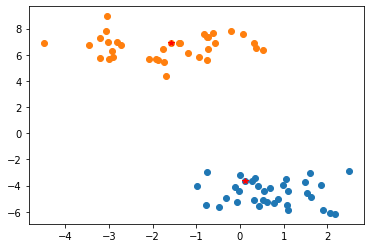

In [258]:
# show initial clusters and centroid points
plt.scatter(c1[:, 0], c1[:, 1])
plt.scatter(c2[:, 0], c2[:, 1])
plt.plot(initial_centroid_points[0][0], initial_centroid_points[0][1], 'r*')
plt.plot(initial_centroid_points[1][0], initial_centroid_points[1][1], 'r*')

In [259]:
# find true centroid 
def true_centroid(cluster):
    # take x and y coordinates of each point in cluseter
    x = []
    y = []
    for i in cluster:
        x.append(i[0])
        y.append(i[1])
    # find mean position of these points
    x_mean = np.mean(x[:])
    y_mean = np.mean(y[:])
    # return as point that we will use as new centroid
    return [x_mean, y_mean]
  

In [260]:
# get new centroid points
new_centroid_points = [true_centroid(c1), true_centroid(c2)]

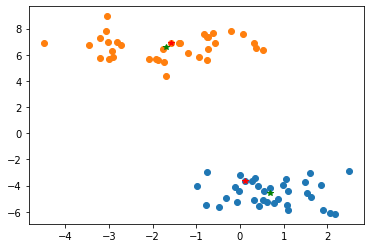

In [261]:
plt.scatter(c1[:, 0], c1[:, 1])
plt.scatter(c2[:, 0], c2[:, 1])
# red points are initial randomly selected centroids
plt.plot(initial_centroid_points[0][0], initial_centroid_points[0][1], 'r*')
plt.plot(initial_centroid_points[1][0], initial_centroid_points[1][1], 'r*')
# green points are new centroids created by mean calculation
plt.plot(new_centroid_points[0][0], new_centroid_points[0][1], 'g*')
plt.plot(new_centroid_points[1][0], new_centroid_points[1][1], 'g*')

In [262]:
# start with diference between centroids as non-zero
difference = 1
# iterate until diference between previous centroid and current is 0
count = 0
while difference != 0:
    # find clusters with newly found centroid
    clusters = cluster(X, new_centroid_points)
    # find new centroid based on new clusters with true_centroid() method
    new_centroid_points = [true_centroid(clusters[0]), true_centroid(clusters[1])]
    # use distance_calc() to see if difference between new centroids is 0
    # if so we have found optimal centroid
    # if not, set initial centroids to the newly found ones and find clusters again
    difference = distance_calc(initial_centroid_points[0][0], initial_centroid_points[0][1], new_centroid_points[0][0], new_centroid_points[0][1])
    initial_centroid_points = new_centroid_points
    count += 1
    
    
# # becasue there is no loss function, minimum percentage convergence condition could be decieving 
# # therefore use max itterations
# for i in range(5000):
#   # find clusters with newly found centroid
#    clusters = cluster(X, new_centroid_points)
#    # find new centroid based on new clusters with true_centroid() method
#    new_centroid_points = [true_centroid(clusters[0]), true_centroid(clusters[1])]
#    # redefine initial points
#    initial_centroid_points = new_centroid_points
#    # add to i
#    i += 1

2


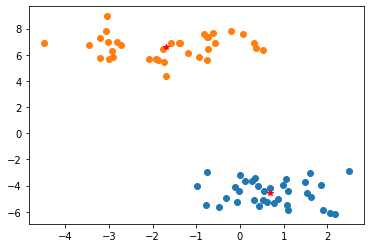

In [263]:
c1 = clusters[0]
c2 = clusters[1]
print(count)

plt.scatter(c1[:, 0], c1[:, 1])
plt.scatter(c2[:, 0], c2[:, 1])
# red points are optimised centroids 
plt.plot(new_centroid_points[0][0], new_centroid_points[0][1], 'r*')
plt.plot(new_centroid_points[1][0], new_centroid_points[1][1], 'r*')